# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
df_colors = pd.read_csv('data/colors.csv')

In [3]:
df_colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [4]:
df_colors['rgb'].count()
# Does not care about uniqueness.
# Only coutns total non-NaN entries

np.int64(135)

In [5]:
df_colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [6]:
df_colors_grouped = df_colors.groupby('is_trans').count()

In [7]:
df_colors_grouped

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


**Another way of counting the frequency of things in a column!!** 

In [8]:
df_colors.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [9]:
df_sets = pd.read_csv('data/sets.csv')

In [10]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [11]:
df_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [12]:

print(df_sets['year'].min())
print(df_sets['name'][df_sets['year'].idxmin()])

1949
Extra-Large Gift Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [13]:
df_sets.sort_values('year')

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178
...,...,...,...,...,...
5837,45030-1,People,2020,516,44
15174,ICECREAMTRUCK-1,Ice Cream Truck,2020,494,60
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [14]:
# Note that here we are filtering our DataFrame on a condition. 
# We are retrieving the rows where the year column has the value 1949
df_sets[df_sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [15]:
df_sets.sort_values('num_parts', ascending=False)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
...,...,...,...,...,...
15669,tsuper-1,Technic Super Set,1991,12,0
11,005-2,Discovery Set,1967,366,0
15700,WEETABIX5-1,Weetabix Promotional Lego Village,1976,413,0
15693,W991526-1,Homeschool Introduction to Simple and Motorize...,2009,529,0


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [16]:
df_sets.groupby('year').count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [17]:
df_num_legos = df_sets.groupby('year').count()

In [18]:
df_num_legos

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


Index([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype='int64', name='year')


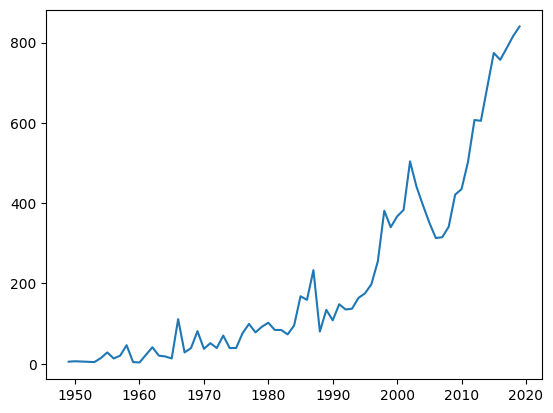

In [19]:
plt.plot(df_num_legos.index[0:-2], df_num_legos['num_parts'][0:-2])
print(df_num_legos.index[0:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

Often you find yourself needing to summarise data. This is where the ```.groupby()``` function comes in really handy. However, sometimes you want to run even more operations based on a particular DataFrame column. This is where the ```.agg()``` method comes in.

In our case, we want to calculate the number of different themes by calendar year. This means we have to group the data by year and then count the number of unique ```theme_ids ```for that year.

#### Number of Themes per Calendar Year

We can accomplish this by chaining the ```.groupby()``` and the ```.agg()``` functions together:

In [20]:
theme_by_year = df_sets.groupby('year').agg({'theme_id': pd.Series.nunique})

Note, the ```.agg()``` method takes a dictionary as an argument. In this dictionary, we specify which operation we'd like to apply to each column. In our case, we just want to calculate the number of unique entries in the theme_id column by using our old friend, the ```.nunique()``` method.



In [21]:
print(theme_by_year)

      theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        89
2018        93
2019        78
2020        82
2021         1

[71 rows x 1 columns]


In [22]:
theme_by_year.rename(columns={'theme_id':'nr_themes'},inplace=True)

In [23]:
theme_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

(0.0, 102.85)

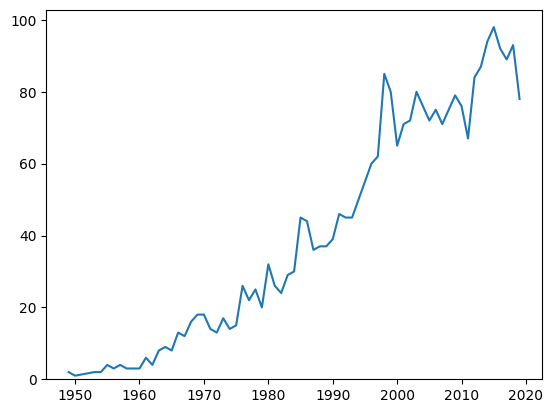

In [24]:
plt.plot(theme_by_year.index[:-2],theme_by_year['nr_themes'][:-2])
plt.ylim(0)

### Line Charts with Two Seperate Axes

#### Superimposing Line Charts with Separate Axes

Wouldn't it be nice to have the number of themes and the number sets on the same chart? But what do we get if we just plot both of them the way we have before? 

##### **Two Separate Axes**

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.
```
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
```
We then create another axis object: ```ax2```. The key thing is that by using the ```.twinx()``` method allows ```ax1``` and ```ax2``` to share the same x-axis. When we plot our data on the axes objects we get this:

In [25]:
sets_by_year = df_sets.groupby('year').agg({'set_num': pd.Series.nunique})

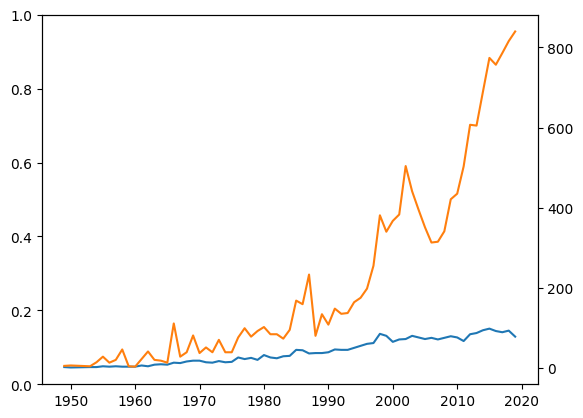

In [26]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

plt.plot(theme_by_year.index[:-2],theme_by_year['nr_themes'][:-2])
plt.plot(sets_by_year.index[:-2],sets_by_year['set_num'][:-2])

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [27]:
avg_nr_parts = df_sets.groupby('year').agg({'num_parts': pd.Series.mean})

In [28]:
avg_nr_parts = avg_nr_parts.round(0).astype(int)

In [29]:
avg_nr_parts

,num_parts
year,
1949,100
1950,1
1953,14
1954,12
1955,37
...,...
2017,222
2018,214
2019,208


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

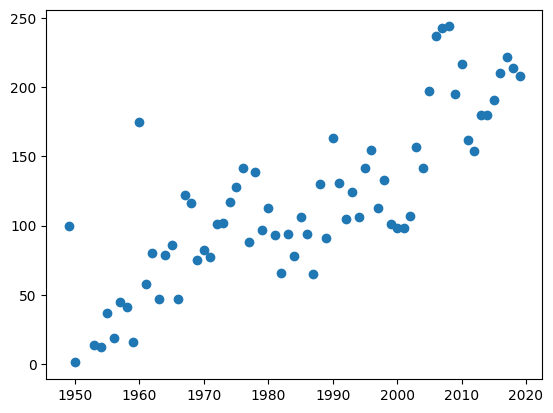

In [30]:
plt.scatter(avg_nr_parts.index[:-2],avg_nr_parts['num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [31]:
df_sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [33]:
df_sets_theme_count = df_sets['theme_id'].value_counts()

In [34]:
df_sets_theme_count

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
512      1
370      1
34       1
475      1
414      1
Name: count, Length: 571, dtype: int64

In [39]:
df_themes = pd.read_csv('data/themes.csv')

In [42]:
df_themes[ df_themes.name == "Star Wars" ]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [44]:
df_themes[ df_themes.id == 158 ]

,id,name,parent_id
150,158,Star Wars,NaN


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [46]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [47]:
df_themes [ df_themes.name == 'Star Wars' ]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [49]:
ids = df_themes [ df_themes.name == 'Star Wars' ]['id' ]

In [50]:
ids

17      18
150    158
174    209
211    261
Name: id, dtype: int64

In [55]:
for i in ids :
    print( f' For id {i} : ')
    print ( df_sets [ df_sets.theme_id == i ] )
    # print(i)
    print()

 For id 18 : 
       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0

 For id 158 : 
           set_num                

### Merging (i.e., Combining) DataFrames based on a Key


Wouldn't it be nice if we could combine our data on theme names with the number sets per theme? 

Let's use the ```.merge()``` method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

Currently, our ```theme_ids``` and our number of sets per theme live inside a Series called ```set_theme_count```.

In [57]:
df_sets_theme_count.head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

To make sure we have a column with the name ```id```, let's convert this Pandas Series into a Pandas DataFrame.

In [60]:
df_sets_theme_count = pd.DataFrame({'id':df_sets_theme_count.index, 'set_count':df_sets_theme_count.values})
df_sets_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


#### The Pandas ```.merge()``` function

To ```.merge()``` two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set ```on='id'```. Both our ```set_theme_count``` and our ```themes``` DataFrames have a column with this name.


In [62]:
merged_df = pd.merge(df_sets_theme_count, df_themes, on='id')


In [64]:
# The first 3 rows in our merged DataFrame look like this:

merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


#### Creating a Bar Chart

Matplotlib can create almost any chart imaginable with very few lines of code. Using ```.bar()``` we can provide our theme names and the number of sets. This is what we get:




<BarContainer object of 10 artists>

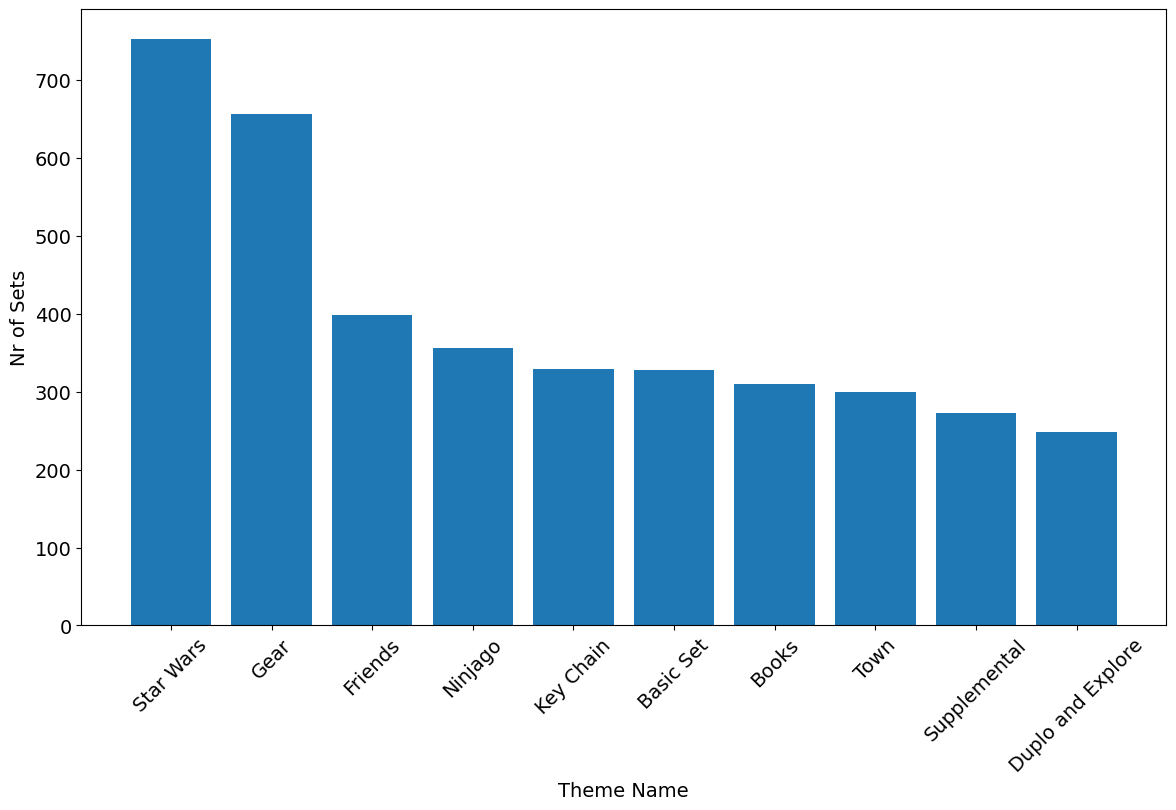

In [66]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10],merged_df.set_count[:10])